In [3]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
a,b,c,d,x = symbols("a b c d x")

In [4]:
#calculate the condition nubmers for vandermonde matrix

1d)

In [5]:
for m in [5,10,20,30]:
    arr = [-1 +  ( ( 2 * k )/m ) for k in range(m + 1)]
    
    k_2 = np.linalg.cond(np.vander(arr),2)
    print("n = ",m,": ",k_2)


n =  5 :  63.82728259639297
n =  10 :  13951.626931490096
n =  20 :  831377047.0828636
n =  30 :  56422549258989.38


In [6]:
# for n in [5,10,20,30]
# n = 5
# points = np.linspace([0,5,5])
# np.vander([1,1,1])

 [Polynomial interpolation versus least squares fitting] 

In [7]:
# X 0.0 0.5 1.0 1.5 2.0 2.5
# Y 0.0 0.20 0.27 0.30 0.32 0.33

In [8]:
from to_m import str_to_m

In [9]:
str_to_m("0.0 0.5 1.0 1.5 2.0 2.5")
str_to_m("0.0 0.20 0.27 0.30 0.32 0.33")

'[[0.0,0.20,0.27,0.30,0.32,0.33]]'

In [10]:
x = [0.0,0.5,1.0,1.5,2.0,2.5]
y = [0.0,0.20,0.27,0.30,0.32,0.33]


In [11]:
k=1

In [12]:
points = np.linspace(1,1/2,10)
c = lambda x:[1,x,x**2,x**3]
arr = x[:(k + 1)]
A = [c(x) for x in arr]
Matrix(A)

Matrix([
[1,   0,    0,     0],
[1, 0.5, 0.25, 0.125]])

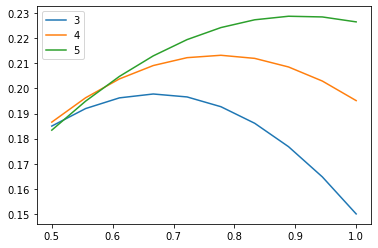

In [13]:
fig, axs = plt.subplots(1) 
for k in [3,4,5]:
    arr = x[:(k + 1)]
    A = np.array([c(x) for x in arr])
    coeff = np.linalg.solve(A.T @ A,A.T @ y[:(k+1)])
    poly = lambda x: np.sum([coeff[k] * x**k for k in range(3)])
    

    axs.plot(points,[poly(point) for point in points])
axs.legend([3,4,5])


In [14]:
x[:5]

[0.0, 0.5, 1.0, 1.5, 2.0]

[Composite (summierte) trapezoidal and Simpson sum]

In [15]:
# A = ( (x - b) *  c ) /(a - b) + (( x -a) * d )/ ( b - a)
# A

In [16]:
# (integrate(A,(x,a,b)) ) .simplify().factor()

In [17]:
# m = 10
# for k in range(m + 1):
#     x_i = 0 + k * ( ( 5 - 0 )/m ) 
#     print(x_i)


<img src='integral.PNG'><img>

In [18]:
m = 10
a = 4
b = 5
x_i_1 = a
for k in range(1,m + 1):
    x_i = x_i_1
    x_i_1 = a + k * ( ( b - a )/m ) 
    
    print(x_i)

4
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9


In [19]:
def trapazoid(f,a, b):
    u = (b - a)
    v = (f(a) + f(b))
    return (u * v) / 2
def simpson(f,a, b):
    u = (b - a)
    v = (f(a) + 4 * f((a + b)/2) + f(b))
    return (u * v) / 6

In [20]:
a = 1
def f(x):
    return x



In [21]:
def approx_int(m,f,interval = (0,10),rule = trapazoid):
    assert interval.__len__() == 2
    a = interval[0]
    b = interval[1]
    x_i_1 = a
    sum = 0
    for k in range(1,m + 1):
        x_i = x_i_1
        x_i_1 = a + k * ( ( b - a )/m ) 
        sum += rule(f,x_i, x_i_1)
    return sum
    
        
    

$$ { \int_{0.1}^{1}  \sqrt{x} \,dx} $$

In [22]:
approx_int(20,np.sqrt,(0.1,1))

0.6454030210934352

In [23]:
R = (2/3) - np.sqrt(10)/150


In [24]:
np.exp(np.round(np.linspace(0,10,10)))

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
       8.10308393e+03, 2.20264658e+04])

In [25]:
import matplotlib.pyplot as plt

In [26]:
error_t = []
error_s = []

m = 10
M = []
for _ in range(1,10):
    M.append(m)
    error_s.append ( R -  approx_int(m,np.sqrt,(0.1,1),simpson) ) 
    error_t.append( R -  approx_int(m,np.sqrt,(0.1,1),trapazoid) ) 
    m *= 2

In [27]:
#least square fehler
A = np.array([[1,np.log(m)] for m in range(1,10)])
y = np.array([[np.log(m)] for m in error_t])


In [28]:
coef = np.linalg.solve(A.T @ A , A.T @ y)
coef

array([[-5.6077123 ],
       [-5.03522346]])

$$ c* m ^k $$

In [29]:
# np.exp(coeff[0] +  (5) * np.exp(coef[1]) )

In [30]:
#buch
( (1 - 0.1)**3 / (12 * 5**2) )  * np.abs( ( -1/4 * ( 0.1**(-3/2)))  )

0.019210836785522906

plot

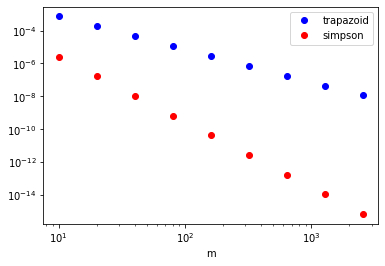

In [31]:

fig, axs = plt.subplots(1) 
axs.set_xlabel("m")
axs.set_xscale('log')
axs.plot(M, error_t,"bo")
axs.plot(M, error_s,"ro")
axs.legend(["trapazoid","simpson"])
axs.set_yscale('log')
    
    

In [32]:
M

[10, 20, 40, 80, 160, 320, 640, 1280, 2560]

[Polynomial interpolation and error estimation] 

a)

In [33]:

def f(x):
    return np.exp(3*x)

In [34]:
f_1 =  2 * (np.exp(3/2) - 1 ) 
f_2 =   2* (np.exp(3) - np.exp(3/2) ) 
c0 = 1

c2 = f_2 - f_1
c1 = f_1 - 1/2* c2 
#fehler

In [54]:
c1

-5.158780641835412

In [35]:
c0 + c1 * (1) + c2 * (1)**2

20.085536923187668

interpolationspolynom dividtierte differenzen

Pn(x) = a0 + a1(x − x0) + a2(x − x0)(x − x1)


In [36]:
def p_n(x):
    return c0 + f_1*(x - 0) + c2 *( x - 0) * (x - 1/2)

In [37]:
def p(x):
    return c0 + c1 * x + c2 * x**2

In [38]:
f(1) - p(1)


0.0

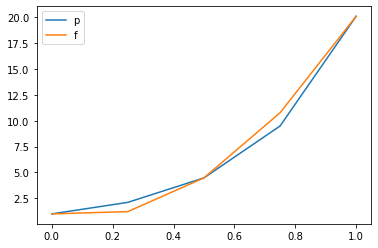

In [39]:

points = np.linspace(0,1,5)
fig,axs = plt.subplots(1)
axs.plot(points,f(points))
axs.plot(points,p_n(points))
axs.legend(("p","f"))


In [40]:
def Lagrange(arr,k):
    x_i = arr[k]
    def lk(x):
        L = 1
        for xk in arr:
            if xk == x_i:
                0
            else:
            
                L *= (x - xk)/(x_i - xk)
        return L
    return lk

Lagrange([0,1/2,1],1)(1/2) # (points,index)(variable)
        
    

1.0

Text(0.5, 1.0, 'Lagrange Basis polynomials')

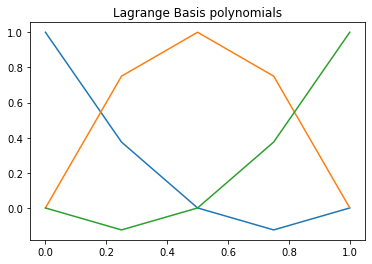

In [41]:
points = np.linspace(0,1,5)
fig,axs = plt.subplots(1)
i = 0
for i in range(3):
    axs.plot(points,Lagrange([0,1/2,1],i)(points))
axs.set_title('Lagrange Basis polynomials')

c)


In [42]:
#error estimate
M = (3**4)* (np.exp(3)) # E^(3 * 1)
f_4 = 4 * 3 * 2 * 1
g = lambda x: (M*(x - 0)*(x - 1/2) * ( x - 1 )) /f_2

In [43]:
print(f(3/4) - p(3/4))
print(g(3/4))

-1.2806073125903996
-2.4437008654663672


d)

In [44]:
arr = [0,1]
L_0_d = 1/(1 - 0)
L_1_d = 1/(0 - 1)
def L_d(k):
    if k == 0 : return 1
    if k == 1 : return -1

def H_k(x,k):
    return (Lagrange(arr,k)(x) **2) * ( 1 - 2* L_d(k) * (x -arr[k]))
def K_k(x,k):
    return ( (Lagrange(arr,k)(x) )**2) * ( x - arr[k])

In [45]:
(Lagrange(arr,0)(0) **2) * ( 1 - 2* L_d(0) * (0 -arr[0]))

1.0

In [46]:
H_k(1,0)

-0.0

In [47]:
Lagrange(arr,1)(1)

1.0

In [48]:
def f_d(x):
    return 3*f(x)

In [49]:
Lagrange(arr,1)(1)

1.0

In [50]:
for k in range(1):
    print(k)

0


In [51]:
def hermite(x):
    sum = 0
    for k in range(2):
        x_k = arr[k]
        sum += H_k(x,k)*f(x_k) + K_k(x,k) * f_d(x_k)
    return sum

In [52]:
[hermite(x) for x in points]

[1.0,
 -2.7490766586728803,
 -7.1570763461953755,
 -2.7151536298232655,
 20.085536923187668]

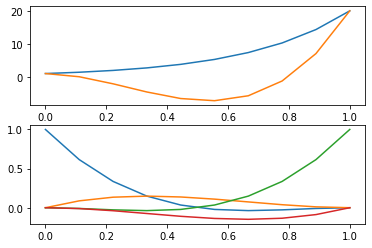

In [53]:

points = np.linspace(0,1,10)
fig,axs = plt.subplots(2)

axs[0].plot(points,f(points))
axs[0].plot(points,[hermite(x) for x in points])

for k in range(2):
    axs[1].plot(points,H_k(points,k))
    axs[1].plot(points,K_k(points,k))
